In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

# Load the dataset
ls dataset_v1.csv

ls: cannot access 'drive/MyDrive/dataset_dadn.csv': No such file or directory


## Data Cleaning

In [5]:
dir

<function dir>

In [6]:
# Read data
file_path = "datset_v1.csv"
df = pd.read_csv(file_path, encoding='utf-8')
df

FileNotFoundError: [Errno 2] No such file or directory: 'datset_v1.csv'

In [ ]:
df.shape

(1897, 25)

Drop the first unit row

In [ ]:
# delete the first row (units)
df = df.drop(0)
df.shape

(1896, 25)

Rename columns

In [ ]:
new_cols = ["place", "observation_point", "province", "district", "coordinate", "date", "temperature", "pH", "DO",
            "conductivity", "alkalinity", "no2", "nh4", "po4", "h2s", "tss", "cod", "aeromonas_total",
            "edwardsiella_ictaluri", "aeromonas_hydrophila", "coliform", "wqi", "water_quality",
            "exceeding_index", "recommendation"]

df.columns = new_cols

In [ ]:
# drop NaN, drop no need col
df = df.dropna()
df.drop(columns=["observation_point", "province", "district", "coordinate", "date", "exceeding_index", "recommendation"], inplace=True)
df.shape

<ipython-input-29-011740b6ccc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["observation_point", "province", "district", "coordinate", "date", "exceeding_index", "recommendation"], inplace=True)


(1612, 18)

In [ ]:
df

,place,temperature,pH,DO,conductivity,alkalinity,no2,nh4,po4,h2s,tss,cod,aeromonas_total,edwardsiella_ictaluri,aeromonas_hydrophila,coliform,wqi,water_quality
1,19.0,28,7,4,598,74,"0,267","5,031","2,712",0,"37,5","23,7",2255,Âm tính,Dương tính,4300,16.0,Xấu
36,13.0,29,"7,5",4,276,"71,4","0,089","3,68","0,864",0,126,"16,7",320,Âm tính,Dương tính,1500,22.0,Xấu
37,19.0,28,7,4,499,66,"0,128","2,716","0,635",0,46,"16,1",1136,Âm tính,Dương tính,9300,27.0,Trung bình
39,7.0,31,"7,5","4,5",239,82,"0,034","1,167","0,446","0,018",46,"17,6",1409,Âm tính,Dương tính,110000,57.0,Trung bình
40,10.0,30,"7,3","4,5",246,78,"0,034","1,083","0,441","0,018",56,"16,3",1200,Âm tính,Dương tính,110000,62.0,Trung bình
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,37.0,30,"7,2","4,5",6600,"59,1","0,016","0,016",0,0,"97,5","5,5",718,Âm tính,Âm tính,9300,68.0,Rất tốt
1893,5.0,30,"7,5",4,299,46,"0,004","0,015",0,0,26,"8,4",16000,Âm tính,Dương tính,1100000,47.0,Trung bình
1894,20.0,28,7,4,194,54,"0,006","0,015",0,"0,012","30,5","4,6",720,Âm tính,Dương tính,2100,93.0,Rất tốt
1895,24.0,"27,3",7,4,157,50,"0,008","0,011",0,"0,019",29,"8,6",4200,Âm tính,Dương tính,15000,47.0,Tốt


In [ ]:
df['water_quality'].value_counts()

,count
water_quality,
Rất tốt,779
Tốt,381
Rất tốt,330
Trung bình,102
Xấu,11
Kém,7
Tôt,2


+ replace Kem w 0, (start with K)
+ replace Xau w 1, (start with X)
+ replace Trung binh w 2, (start with Tr)
+ replace Tot w 3, (start with T)
+ replace Rat tot w 4, (start with R)


In [ ]:
df['water_quality'] = df['water_quality'].replace(
    {r'^K': 0, r'^X': 1, r'^Tr': 2, r'^T': 3, r'^R': 4}, regex=True
)

<ipython-input-30-aab61fb14183>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['water_quality'] = df['water_quality'].replace(


In [ ]:
df

,place,temperature,pH,DO,conductivity,alkalinity,no2,nh4,po4,h2s,tss,cod,aeromonas_total,edwardsiella_ictaluri,aeromonas_hydrophila,coliform,wqi,water_quality
1,19.0,28,7,4,598,74,"0,267","5,031","2,712",0,"37,5","23,7",2255,Âm tính,Dương tính,4300,16.0,1
36,13.0,29,"7,5",4,276,"71,4","0,089","3,68","0,864",0,126,"16,7",320,Âm tính,Dương tính,1500,22.0,1
37,19.0,28,7,4,499,66,"0,128","2,716","0,635",0,46,"16,1",1136,Âm tính,Dương tính,9300,27.0,2
39,7.0,31,"7,5","4,5",239,82,"0,034","1,167","0,446","0,018",46,"17,6",1409,Âm tính,Dương tính,110000,57.0,2
40,10.0,30,"7,3","4,5",246,78,"0,034","1,083","0,441","0,018",56,"16,3",1200,Âm tính,Dương tính,110000,62.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,37.0,30,"7,2","4,5",6600,"59,1","0,016","0,016",0,0,"97,5","5,5",718,Âm tính,Âm tính,9300,68.0,4
1893,5.0,30,"7,5",4,299,46,"0,004","0,015",0,0,26,"8,4",16000,Âm tính,Dương tính,1100000,47.0,2
1894,20.0,28,7,4,194,54,"0,006","0,015",0,"0,012","30,5","4,6",720,Âm tính,Dương tính,2100,93.0,4
1895,24.0,"27,3",7,4,157,50,"0,008","0,011",0,"0,019",29,"8,6",4200,Âm tính,Dương tính,15000,47.0,3


In [ ]:
df["aeromonas_hydrophila"].value_counts()

,count
aeromonas_hydrophila,
Dương tính,1110
Âm tính,502


replace Dương tính w 1 (start with D) else 0

In [ ]:
df['aeromonas_hydrophila'] = np.where(df['aeromonas_hydrophila'].str.startswith('D'), 1, 0)
df['edwardsiella_ictaluri'] = np.where(df['edwardsiella_ictaluri'].str.startswith('D'), 1, 0)
df

,place,temperature,pH,DO,conductivity,alkalinity,no2,nh4,po4,h2s,tss,cod,aeromonas_total,edwardsiella_ictaluri,aeromonas_hydrophila,coliform,wqi,water_quality
1,19.0,28,7,4,598,74,"0,267","5,031","2,712",0,"37,5","23,7",2255,0,1,4300,16.0,1
36,13.0,29,"7,5",4,276,"71,4","0,089","3,68","0,864",0,126,"16,7",320,0,1,1500,22.0,1
37,19.0,28,7,4,499,66,"0,128","2,716","0,635",0,46,"16,1",1136,0,1,9300,27.0,2
39,7.0,31,"7,5","4,5",239,82,"0,034","1,167","0,446","0,018",46,"17,6",1409,0,1,110000,57.0,2
40,10.0,30,"7,3","4,5",246,78,"0,034","1,083","0,441","0,018",56,"16,3",1200,0,1,110000,62.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,37.0,30,"7,2","4,5",6600,"59,1","0,016","0,016",0,0,"97,5","5,5",718,0,0,9300,68.0,4
1893,5.0,30,"7,5",4,299,46,"0,004","0,015",0,0,26,"8,4",16000,0,1,1100000,47.0,2
1894,20.0,28,7,4,194,54,"0,006","0,015",0,"0,012","30,5","4,6",720,0,1,2100,93.0,4
1895,24.0,"27,3",7,4,157,50,"0,008","0,011",0,"0,019",29,"8,6",4200,0,1,15000,47.0,3


Replace <1 by 0.5

In [ ]:
d = df["aeromonas_total"].value_counts()
print(d)
for v in d.index:
    try:
        float(v)
    except:
        print("-----")
        print("error", v)

aeromonas_total
0        41
<1       25
30       23
150      23
120      22
         ..
1610      1
1490      1
2255      1
16000     1
6900      1
Name: count, Length: 386, dtype: int64
-----
error <1
-----
error < 1


In [ ]:
df["aeromonas_total"] = (
    df["aeromonas_total"]
    .str.replace(',', '.')  # replace ',' by '.'
    .str.extract(r'([\d.]+)')[0]  # remove all characters except digits and '.'
    .pipe(pd.to_numeric, errors='coerce') # convert to numeric , errors='coerce' to replace error by NaN
)

# fill NaN by 0.5
df["aeromonas_total"].fillna(0.5, inplace=True)

<ipython-input-32-a5626ad6690f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["aeromonas_total"].fillna(0.5, inplace=True)


In [ ]:
d = df["coliform"].value_counts()

for v in d.index:
    try:
        float(v)
    except:
        print("-----")
        print("error", v)

-----
error <1
-----
error 1,100,000
-----
error -


In [ ]:
df["coliform"] = (
    df["coliform"]
    .str.replace(',', '.')  # replace ',' by '.'
    .str.extract(r'([\d.]+)')[0]  # remove all characters except digits and '.'
    .pipe(pd.to_numeric, errors='coerce') # convert to numeric , errors='coerce' to replace error by NaN
)

# fill NaN by 0.5
df["coliform"].fillna(0.5, inplace=True)

<ipython-input-34-35d0634aedac>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coliform"].fillna(0.5, inplace=True)


Convert to int

In [ ]:
# replace `,` with `.` and convert to float
for col in df.columns:
    # traverse all object columns
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.').astype(float)
        except:
            print("error", col)

## Exploratory Data Analysis

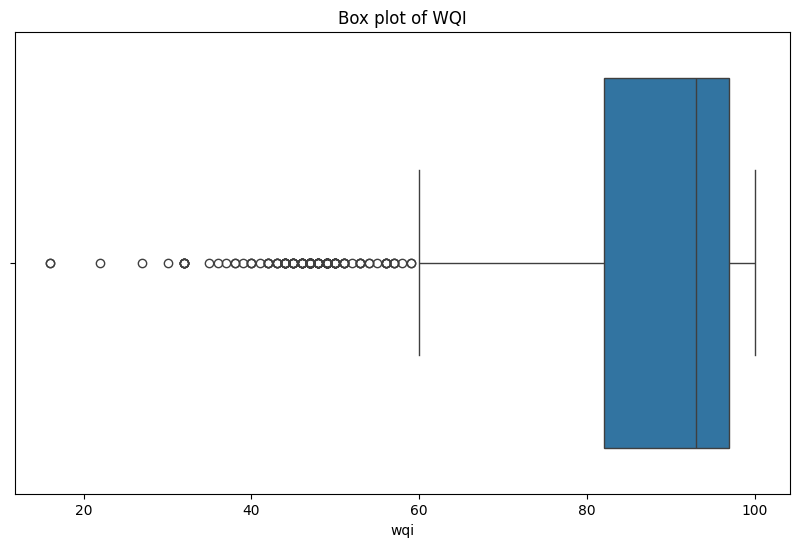

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wqi', data=df)
plt.title('Box plot of WQI')
plt.show()

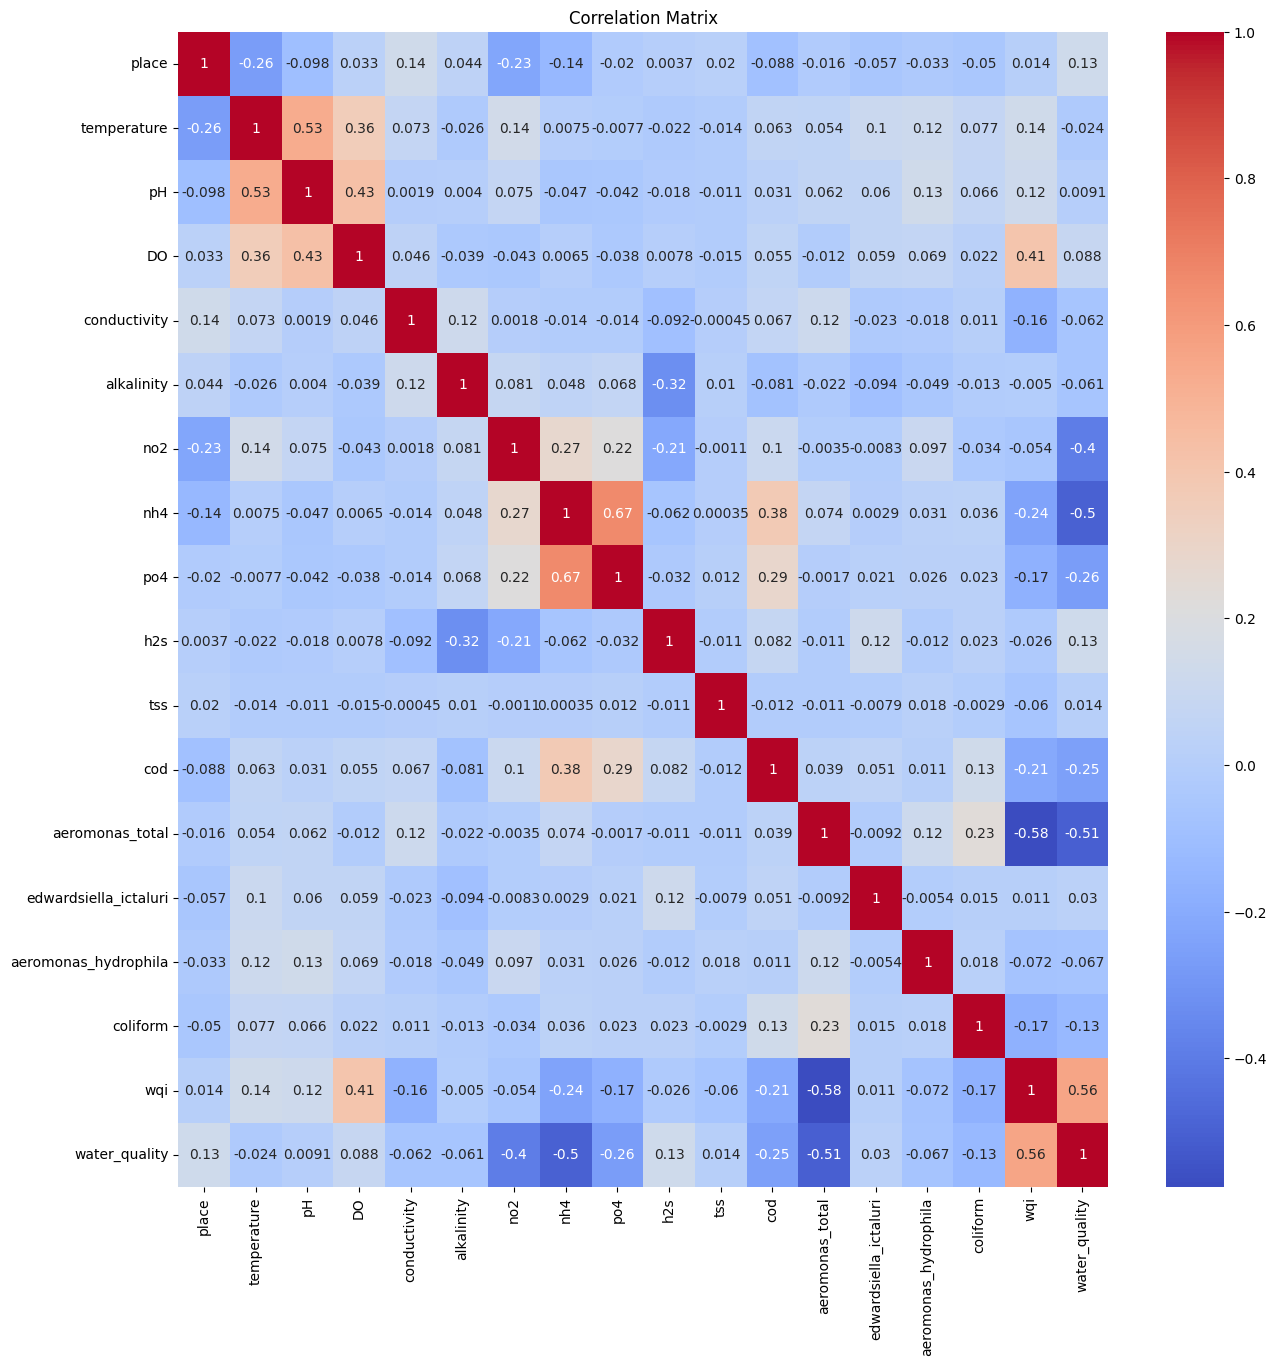

In [ ]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# sort the correlation of WQI (abs)
corr_wqi = corr['wqi'].abs().sort_values(ascending=False)
corr_wqi

,wqi
wqi,1.000000
aeromonas_total,0.575129
water_quality,0.559882
DO,0.405569
nh4,0.242775
cod,0.211244
po4,0.174990
coliform,0.171319
conductivity,0.163367
temperature,0.137943


So, top 3 features that havin' most correlation with wqi are

|feature|R^2|
|---|---|
|aeromonas_total|0.575129|
|water_quality|0.559882|
|DO|0.405569|
|nh4|0.242775|
|cod|0.211244|
|po4|0.174990|
|coliform|0.171319|
|conductivity|0.163367|
|temperature|0.137943|
|pH|0.121363|

## Modeling

In [ ]:
# Linear Regression, Random Forest, XGboost, KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

### `train_test_split`

Train test split w rate 80% train, 20% test

In [ ]:
X = df.drop(columns=['wqi'])
y = df['wqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()
knn = KNeighborsRegressor()

results = {
    "models": [linear_regression, random_forest, xgboost, knn],
    "model_names": ["Linear Regression", "Random Forest", "XGBoost", "KNN"],
    "mse": [],
    "mae": [],
    "r2": [],
    "mape": []
}

Train model, save results

### Models training

In [ ]:
for model in results["models"]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results["mse"].append(mse)
    results["mae"].append(mae)
    results["r2"].append(r2)
    results["mape"].append(mape)

results_df = pd.DataFrame(results)
results_df

,models,model_names,mse,mae,r2,mape
0,LinearRegression(),Linear Regression,92.443952,6.611003,0.593389,0.098415
1,"(DecisionTreeRegressor(max_features=1.0, rando...",Random Forest,6.121997,0.855387,0.973073,0.014042
2,"XGBRegressor(base_score=None, booster=None, ca...",XGBoost,3.255232,0.700063,0.985682,0.010937
3,KNeighborsRegressor(),KNN,123.596904,7.556037,0.456364,0.106060


Plot results

Text(0.5, 1.0, 'MSE of models')

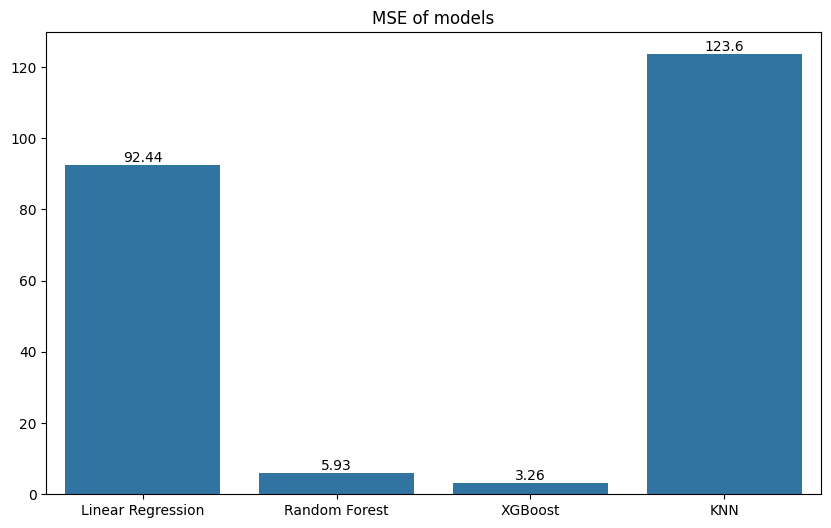

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = results["model_names"], y = results["mse"])
for i, mse in enumerate(results["mse"]):
    plt.text(i, mse, round(mse, 2), ha='center', va='bottom')

plt.title('MSE of models')

XGBoost brings outstanding performance (3.26 MSE)

In [ ]:
# feature important xgboost
importances = xgboost.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
12,aeromonas_total,0.459703
3,DO,0.292966
7,nh4,0.123265
10,tss,0.068238
8,po4,0.020034
11,cod,0.012547
16,water_quality,0.010084
4,conductivity,0.010070
6,no2,0.000643
0,place,0.000631


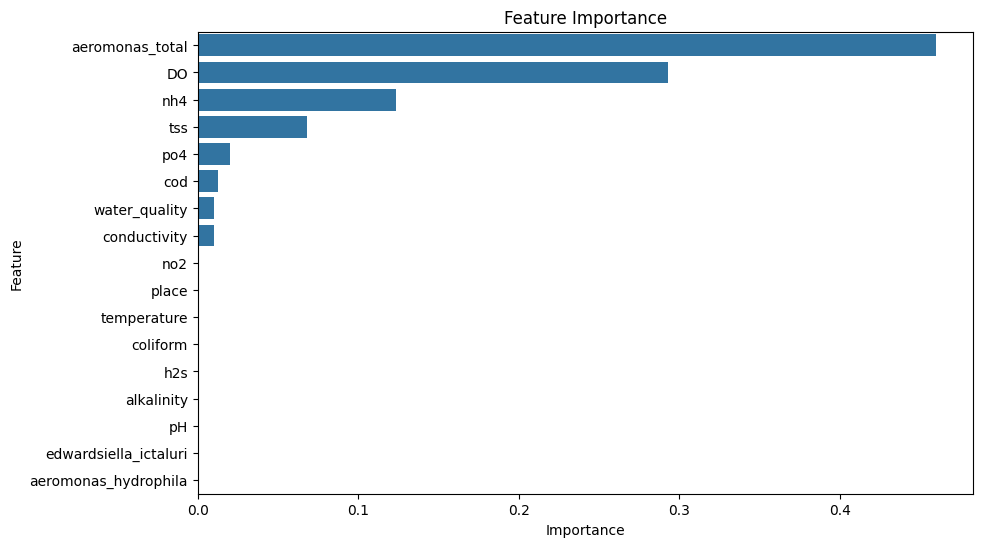

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [ ]:
y_test

,wqi
70,44.0
343,91.0
491,97.0
541,98.0
320,97.0
...,...
1179,99.0
1832,63.0
642,63.0
538,93.0


In [ ]:
y_pred

array([46.2, 88.4, 93.2, 97.2, 95.6, 97.2, 91.6, 81.4, 92.2, 95.6, 95.6,
       95.8, 66.2, 90.6, 87.8, 92.8, 69.6, 63.2, 82. , 86.6, 89.8, 63.2,
       94.2, 94. , 93.2, 80.6, 88.8, 45.2, 85.4, 90.6, 94.4, 89.8, 88.6,
       95.8, 87. , 86.8, 81.8, 86. , 94.2, 93.6, 89.4, 90.4, 84.2, 94.4,
       81. , 94. , 94.4, 82. , 56. , 86.8, 98. , 87.4, 87.4, 74.8, 84.4,
       88. , 96.2, 88.8, 93.2, 83.6, 93.4, 93.4, 89.2, 85.6, 90. , 84.2,
       89.2, 96. , 87.4, 88. , 86.8, 85.2, 84.6, 83.8, 89.2, 91.6, 94.6,
       84.4, 89.6, 85.6, 94.6, 87.8, 92.6, 92.2, 95. , 90.2, 95.4, 94.6,
       95.2, 95.2, 78.6, 91. , 87.4, 95.6, 86.8, 96.2, 79. , 88.6, 81.4,
       92.6, 91.8, 46.2, 95.4, 89.4, 94. , 95. , 95.8, 93. , 80.2, 92.4,
       89.2, 87.8, 87.4, 79.6, 92.6, 93. , 77.4, 93. , 92.4, 94.6, 93.2,
       78.6, 89. , 94.6, 77. , 87.8, 90.2, 89. , 77. , 93.2, 93.4, 44.4,
       87.4, 69.6, 85.4, 91. , 95.6, 80.2, 86.4, 91.2, 93.4, 80. , 94.2,
       91.8, 95.4, 79.8, 92.8, 90.2, 93.4, 88.6, 91

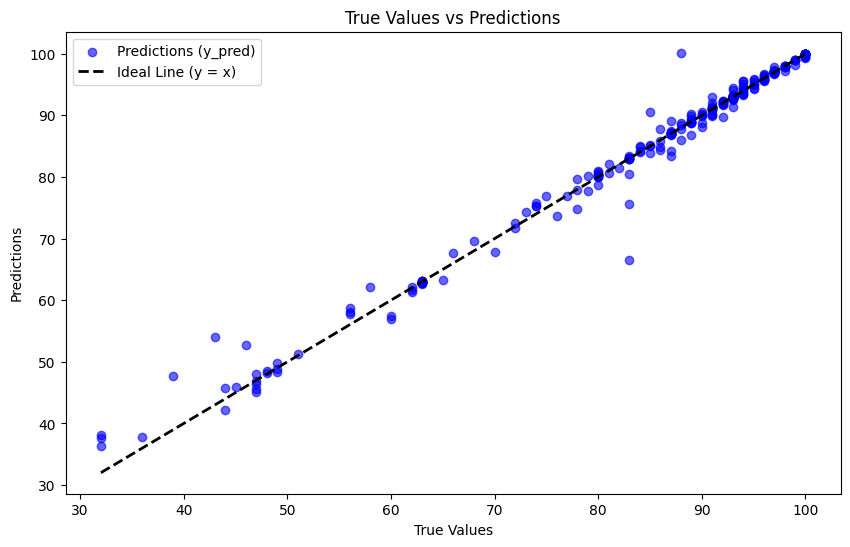

In [ ]:
y_pred = xgboost.predict(X_test)
plt.figure(figsize=(10, 6))

# y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions (y_pred)")

# y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line (y = x)")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.legend()
plt.show()


### Reduced features XGBoost

In [ ]:
# Take the top 5 features
top_5_features = feature_importances.head(5)['Feature'].values
top_5_features

array(['aeromonas_total', 'DO', 'nh4', 'tss', 'po4'], dtype=object)

In [ ]:
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

xgboost1 = XGBRegressor()
xgboost1.fit(X_train_top5, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgboost1.predict(X_test_top5)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("XGBoost with top 5 features")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)
print("MAPE:", mape)

XGBoost with top 5 features
MSE: 3.6771756648097274
MAE: 0.9214067842938214
R2: 0.983826082992645
MAPE: 0.0127956900851935


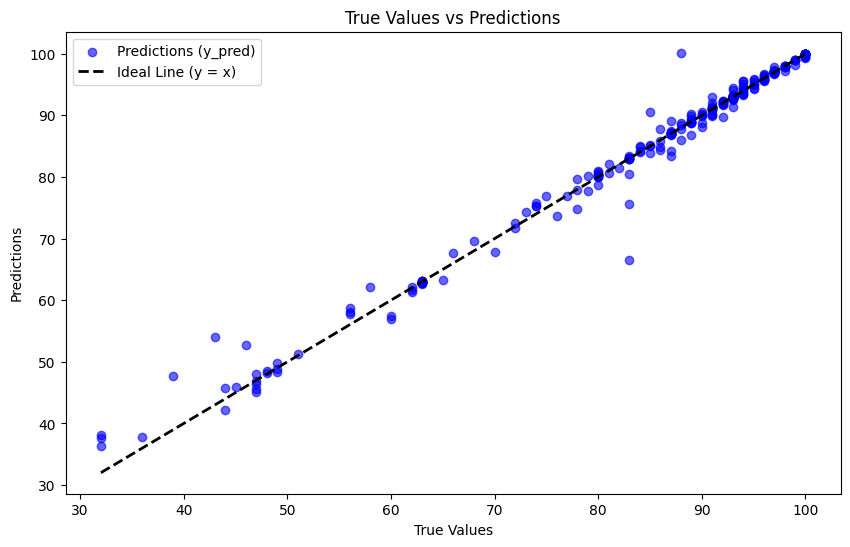

In [ ]:
y_pred = xgboost.predict(X_test)
plt.figure(figsize=(10, 6))

# y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions (y_pred)")

# y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line (y = x)")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.legend()
plt.show()


In [ ]:
# xgboost except pH
X_train_except_pH = X_train.drop(columns=['pH'])
X_test_except_pH = X_test.drop(columns=['pH'])
xgboost2 = XGBRegressor()
xgboost2.fit(X_train_except_pH, y_train)

y_pred = xgboost2.predict(X_test_except_pH)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


In [ ]:
print("XGBoost except pH")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)
print("MAPE:", mape)

XGBoost except pH
MSE: 3.1653293483187688
MAE: 0.6947346619408197
R2: 0.9860774195068807
MAPE: 0.010676426502205159


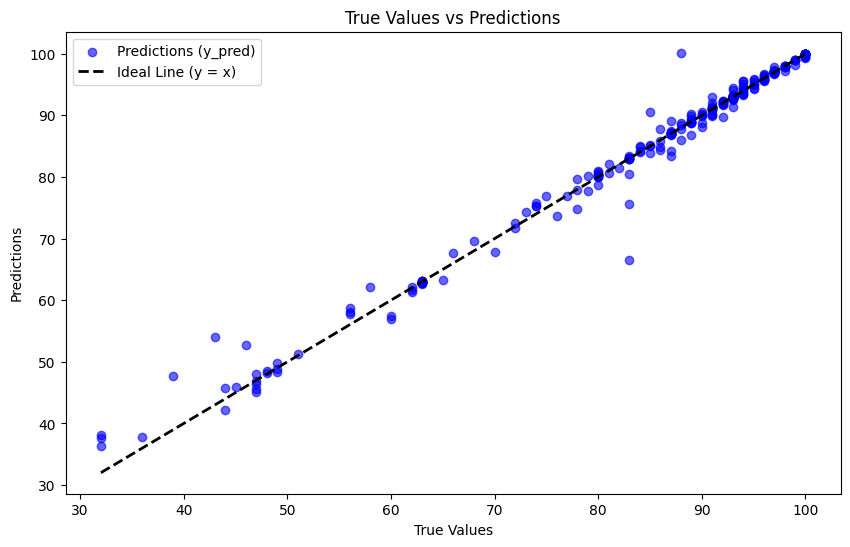

In [ ]:
y_pred = xgboost.predict(X_test)
plt.figure(figsize=(10, 6))

# y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions (y_pred)")

# y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line (y = x)")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.legend()
plt.show()

# hazz


# Task
dựa theo bài đang hiện có ở trên làm thêm với thuật toán long short term memory

Here is all the data you need:
"dataset_DACN - 2024-2022.xlsx"

## Data loading

### Subtask:
Load the Excel file "dataset_DACN - 2024-2022.xlsx" into a Pandas DataFrame.


**Reasoning**:
Load the Excel file into a pandas DataFrame.



## Data preparation

### Subtask:
Prepare the data for LSTM modeling by:


**Reasoning**:
Start the data preparation for LSTM by selecting relevant features, handling missing values, and scaling the data.



In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # 1. Feature Selection
# # Select relevant features based on the data exploration results
# selected_features = ['Ngày quan trắc', 'Nhiệt độ', 'pH', 'DO', 'Độ dẫn', 'TSS', 'COD', 'WQI']
# df_lstm = df[selected_features].copy()

# # 2. Missing Value Handling
# # Impute missing values with the mean for numerical features
# for column in ['Nhiệt độ', 'pH', 'DO', 'Độ dẫn', 'TSS', 'COD', 'WQI']:
#     df_lstm[column].fillna(df_lstm[column].mean(), inplace=True)

# # 3. Data Scaling/Normalization
# # Normalize numerical features using MinMaxScaler
# scaler = MinMaxScaler()
# numerical_features = ['Nhiệt độ', 'pH', 'DO', 'Độ dẫn', 'TSS', 'COD', 'WQI']
# df_lstm[numerical_features] = scaler.fit_transform(df_lstm[numerical_features])

# # 4. Time Series Restructuring (will be done later)
# # Convert 'Ngày quan trắc' to datetime objects
# df_lstm['Ngày quan trắc'] = pd.to_datetime(df_lstm['Ngày quan trắc'])

# # Sort the DataFrame by date
# df_lstm.sort_values('Ngày quan trắc', inplace=True)

# display(df_lstm.head())
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Feature Selection
# Select relevant features based on the data exploration results
# Using English column names from new_cols
selected_features = ['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod', 'wqi']
df_lstm = df[selected_features].copy()

# 2. Missing Value Handling
# Impute missing values with the mean for numerical features
# Using English column names
for column in ['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod', 'wqi']:
    df_lstm[column].fillna(df_lstm[column].mean(), inplace=True)

# 3. Data Scaling/Normalization
# Normalize numerical features using MinMaxScaler
# Using English column names
scaler = MinMaxScaler()
numerical_features = ['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod', 'wqi']
df_lstm[numerical_features] = scaler.fit_transform(df_lstm[numerical_features])

# 4. Time Series Restructuring (will be done later)
# Convert 'date' to datetime objects
# df_lstm['date'] = pd.to_datetime(df_lstm['date'])

# Sort the DataFrame by date
# df_lstm.sort_values('date', inplace=True)

display(df_lstm.head())

<ipython-input-45-b1e457c104da>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_lstm[column].fillna(df_lstm[column].mean(), inplace=True)


,temperature,pH,DO,conductivity,tss,cod,wqi
1,0.466667,0.50,0.319149,0.028187,0.000825,1.000000,0.000000
36,0.600000,0.75,0.319149,0.010143,0.002773,0.702128,0.071429
37,0.466667,0.50,0.319149,0.022639,0.001013,0.676596,0.130952
39,0.866667,0.75,0.425532,0.008069,0.001013,0.740426,0.488095
40,0.733333,0.65,0.425532,0.008462,0.001233,0.685106,0.547619


**Reasoning**:
Create input sequences for the LSTM model using a sliding window approach.



In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[selected_features][i:(i + seq_length)].values)
        y.append(data.iloc[i + seq_length]['wqi'])  # Access 'wqi' using .iloc
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create input sequences
X, y = create_sequences(df_lstm, sequence_length)

print(f"Shape of input sequences (X): {X.shape}")
print(f"Shape of target variables (y): {y.shape}")


Shape of input sequences (X): (1601, 10, 7)
Shape of target variables (y): (1601,)


## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets, ensuring the time order is maintained.


**Reasoning**:
Split the data into training, validation, and testing sets while maintaining the time order.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing/validation sets
train_df, test_val_df = train_test_split(df_lstm, test_size=0.2, shuffle=False)

# Split testing/validation sets into testing and validation sets
val_df, test_df = train_test_split(test_val_df, test_size=0.5, shuffle=False)

print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Testing set shape: {test_df.shape}")

Training set shape: (1289, 7)
Validation set shape: (161, 7)
Testing set shape: (162, 7)


## Feature engineering

### Subtask:
Engineer new features from the existing data that might be useful for LSTM, such as lagged variables, moving averages, or other time-series-specific features.


**Reasoning**:
Create lagged features for 'WQI' and 'DO' to capture the previous day's values, which can be useful for predicting future values in a time series context.



In [ ]:
# Create lagged features for 'WQI' and 'DO'
df_lstm['WQI_lag1'] = df_lstm['wqi'].shift(1)
df_lstm['DO_lag1'] = df_lstm['DO'].shift(1)

# Forward fill missing values created by shifting
df_lstm.fillna(method='ffill', inplace=True)

# Display the first few rows to check the new features
display(df_lstm.head())


<ipython-input-53-c6b1473c88fc>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)


,temperature,pH,DO,conductivity,tss,cod,wqi,WQI_lag1,DO_lag1
1,0.466667,0.50,0.319149,0.028187,0.000825,1.000000,0.000000,NaN,NaN
36,0.600000,0.75,0.319149,0.010143,0.002773,0.702128,0.071429,0.000000,0.319149
37,0.466667,0.50,0.319149,0.022639,0.001013,0.676596,0.130952,0.071429,0.319149
39,0.866667,0.75,0.425532,0.008069,0.001013,0.740426,0.488095,0.130952,0.319149
40,0.733333,0.65,0.425532,0.008462,0.001233,0.685106,0.547619,0.488095,0.425532


In [ ]:
# Calculate 7-day moving average of 'WQI' and 'DO'
df_lstm['WQI_MA7'] = df_lstm['wqi'].rolling(window=7).mean()
df_lstm['DO_MA7'] = df_lstm['DO'].rolling(window=7).mean()

# Forward fill missing values created by rolling mean
df_lstm.fillna(method='ffill', inplace=True)

# Display the first few rows to check the new features
display(df_lstm.head())

<ipython-input-55-0645e7e27d9c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)


,temperature,pH,DO,conductivity,tss,cod,wqi,WQI_lag1,DO_lag1,WQI_MA7,DO_MA7
1,0.466667,0.50,0.319149,0.028187,0.000825,1.000000,0.000000,NaN,NaN,NaN,NaN
36,0.600000,0.75,0.319149,0.010143,0.002773,0.702128,0.071429,0.000000,0.319149,NaN,NaN
37,0.466667,0.50,0.319149,0.022639,0.001013,0.676596,0.130952,0.071429,0.319149,NaN,NaN
39,0.866667,0.75,0.425532,0.008069,0.001013,0.740426,0.488095,0.130952,0.319149,NaN,NaN
40,0.733333,0.65,0.425532,0.008462,0.001233,0.685106,0.547619,0.488095,0.425532,NaN,NaN


**Reasoning**:
Calculate the difference between consecutive values of 'WQI' and 'DO' to capture the rate of change over time.



In [ ]:
# Calculate the difference between consecutive values of 'WQI' and 'DO'
df_lstm['WQI_diff'] = df_lstm['wqi'].diff()
df_lstm['DO_diff'] = df_lstm['DO'].diff()

# Forward fill missing values created by difference
df_lstm.fillna(method='ffill', inplace=True)

# Display the first few rows to check the new features
display(df_lstm.head())

<ipython-input-56-35d00f907296>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)


,temperature,pH,DO,conductivity,tss,cod,wqi,WQI_lag1,DO_lag1,WQI_MA7,DO_MA7,WQI_diff,DO_diff
1,0.466667,0.50,0.319149,0.028187,0.000825,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
36,0.600000,0.75,0.319149,0.010143,0.002773,0.702128,0.071429,0.000000,0.319149,NaN,NaN,0.071429,0.000000
37,0.466667,0.50,0.319149,0.022639,0.001013,0.676596,0.130952,0.071429,0.319149,NaN,NaN,0.059524,0.000000
39,0.866667,0.75,0.425532,0.008069,0.001013,0.740426,0.488095,0.130952,0.319149,NaN,NaN,0.357143,0.106383
40,0.733333,0.65,0.425532,0.008462,0.001233,0.685106,0.547619,0.488095,0.425532,NaN,NaN,0.059524,0.000000


**Reasoning**:
Extract the day of the week, month, and year from the 'Ngày quan trắc' column to create new features that might be relevant for LSTM prediction, as certain days of the week or months might have different water quality patterns.



## Model training

### Subtask:
Train an LSTM model for water quality prediction using the training data.


**Reasoning**:
Train an LSTM model using the training data, compile it, and save it.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Convert dataframes to numpy arrays
X_train = train_df[['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod']].values
y_train = train_df['wqi'].values

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Build the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.LSTM(units=50))
model.add(layers.Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the model
model.save('lstm_water_quality_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6046 - mae: 0.7525 - mse: 0.6046
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0841 - mae: 0.2451 - mse: 0.0841
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0384 - mae: 0.1529 - mse: 0.0384
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0336 - mae: 0.1376 - mse: 0.0336
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0354 - mae: 0.1405 - mse: 0.0354
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - mae: 0.1340 - mse: 0.0316
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0289 - mae: 0.1258 - mse: 0.0289
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0294 - mae: 0.1267 - mse: 0.0294
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mae: 0.1296 - mse: 0.0315
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - mae: 0.1124 - mse: 0.0261


## Model optimization

### Subtask:
Optimize the trained LSTM model using the validation data.


**Reasoning**:
Load the saved LSTM model and prepare the validation data for optimization.



In [ ]:
from tensorflow import keras
import numpy as np

# Load the saved LSTM model
model = keras.models.load_model('lstm_water_quality_model.h5')

# Prepare the validation data
X_val = val_df[['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod']].values
y_val = val_df['wqi'].values

# Reshape input data for LSTM
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Function to create the LSTM model
def create_model(units=50, dropout_rate=0.0, learning_rate=0.001):
  model = Sequential()
  model.add(layers.LSTM(units=units, return_sequences=True, input_shape=(X_val.shape[1], X_val.shape[2])))
  model.add(layers.LSTM(units=units))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(1))

  model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['mse'])
  return model

# Define hyperparameter search space
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.0, 0.2],
    'learning_rate': [0.001, 0.01],
}

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_model = None
best_val_loss = float('inf')

for units in param_grid['units']:
  for dropout_rate in param_grid['dropout_rate']:
    for learning_rate in param_grid['learning_rate']:
      model = create_model(units=units, dropout_rate=dropout_rate, learning_rate=learning_rate)
      history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
      val_loss = np.min(history.history['val_loss'])

      if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model
        print(f"New best model found with val_loss: {best_val_loss}, units: {units}, dropout_rate: {dropout_rate}, learning_rate: {learning_rate}")


# Save the optimized model
best_model.save('optimized_lstm_water_quality_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


New best model found with val_loss: 0.049930695444345474, units: 50, dropout_rate: 0.0, learning_rate: 0.001
New best model found with val_loss: 0.04376176744699478, units: 50, dropout_rate: 0.0, learning_rate: 0.01
New best model found with val_loss: 0.043489906936883926, units: 50, dropout_rate: 0.2, learning_rate: 0.01
New best model found with val_loss: 0.04235486313700676, units: 100, dropout_rate: 0.0, learning_rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


New best model found with val_loss: 0.041130851954221725, units: 100, dropout_rate: 0.2, learning_rate: 0.01


In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the optimized LSTM model with custom objects
# Make sure 'optimized_lstm_water_quality_model.h5' exists in the current directory or provide the full path
model = keras.models.load_model('optimized_lstm_water_quality_model.h5', custom_objects={'mse': 'mean_squared_error'})

# Prepare the test dataset
# Assuming 'temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod', 'wqi' are the correct column names
X_test = test_df[['temperature', 'pH', 'DO', 'conductivity', 'tss', 'cod']].values
y_test = test_df['wqi'].values

# Reshape input data for LSTM
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Predict WQI values for the test dataset
y_pred = model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
R-squared (R2): 0.2397373647683212
Mean Squared Error (MSE): 0.03762704583489744
Root Mean Squared Error (RMSE): 0.19397692088209215
Mean Absolute Error (MAE): 0.12054455333303377


In [ ]:
y_pred = xgboost.predict(X_test)
plt.figure(figsize=(10, 6))

# y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions (y_pred)")

# y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line (y = x)")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

plt.legend()
plt.show()

NameError: name 'xgboost' is not defined